Abstract Link: https://docs.google.com/document/d/19WeL7dWidgSilRRCblLaiIJ-TbKE2ilU7M9wfHz2f3U/edit?usp=sharing

Dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating/data


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('speeddating.csv')
df

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [4]:
# Check for missing data - we will need to account for this in preprocessing
df.isnull().sum()

has_null                0
wave                    0
gender                  0
age                    95
age_o                 104
                     ... 
d_guess_prob_liked      0
met                   375
decision                0
decision_o              0
match                   0
Length: 123, dtype: int64

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.dtypes

has_null                            object
wave                               float64
gender                              object
age                                float64
age_o                              float64
d_age                              float64
d_d_age                             object
race                                object
race_o                              object
samerace                            object
importance_same_race               float64
importance_same_religion           float64
d_importance_same_race              object
d_importance_same_religion          object
field                               object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pref_o_attractive                 object
d_pref_o_sincere                    object
d_pref_o_in

In [6]:
df.shape

(8378, 123)

In [9]:
# convert match (our Y class) to numerical 1 and 0
for i in range(df.shape[0]):
  if df['match'][i] == "b'0'":
    df['match'][i] = 0
  else:
    df['match'][i] = 1

<ipython-input-9-1f0c252eb3b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match'][i] = 0
<ipython-input-9-1f0c252eb3b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match'][i] = 1


# Initial Impressions of the Data
There are 8378 observations and 123 features, but we will be dropping a lot of the features for simpler analysis.

The first two columns (is_null and wave) doesn't provide any useful information.

We can categorize the features into self perception (how one rates themselves based on 5 scales), their preferences for partners and hobbies. Many of the other features are not as relevant to the model we are trying to create (more detail in the readme file). Let's do some data exploration on the useful features.

# Self Perception


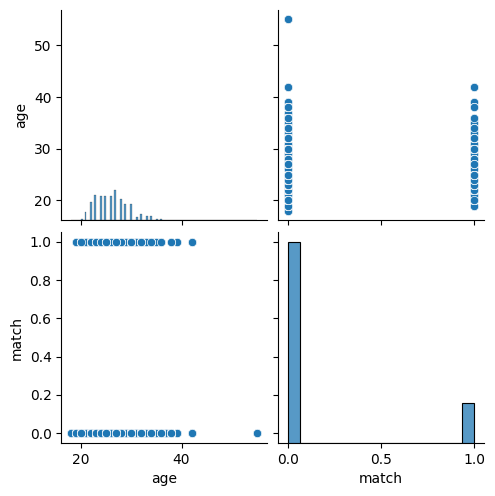

In [12]:
# Let's first explore the correlations of age and match

new = pd.DataFrame([df.age, df.match]).transpose()
sns.pairplot(new)

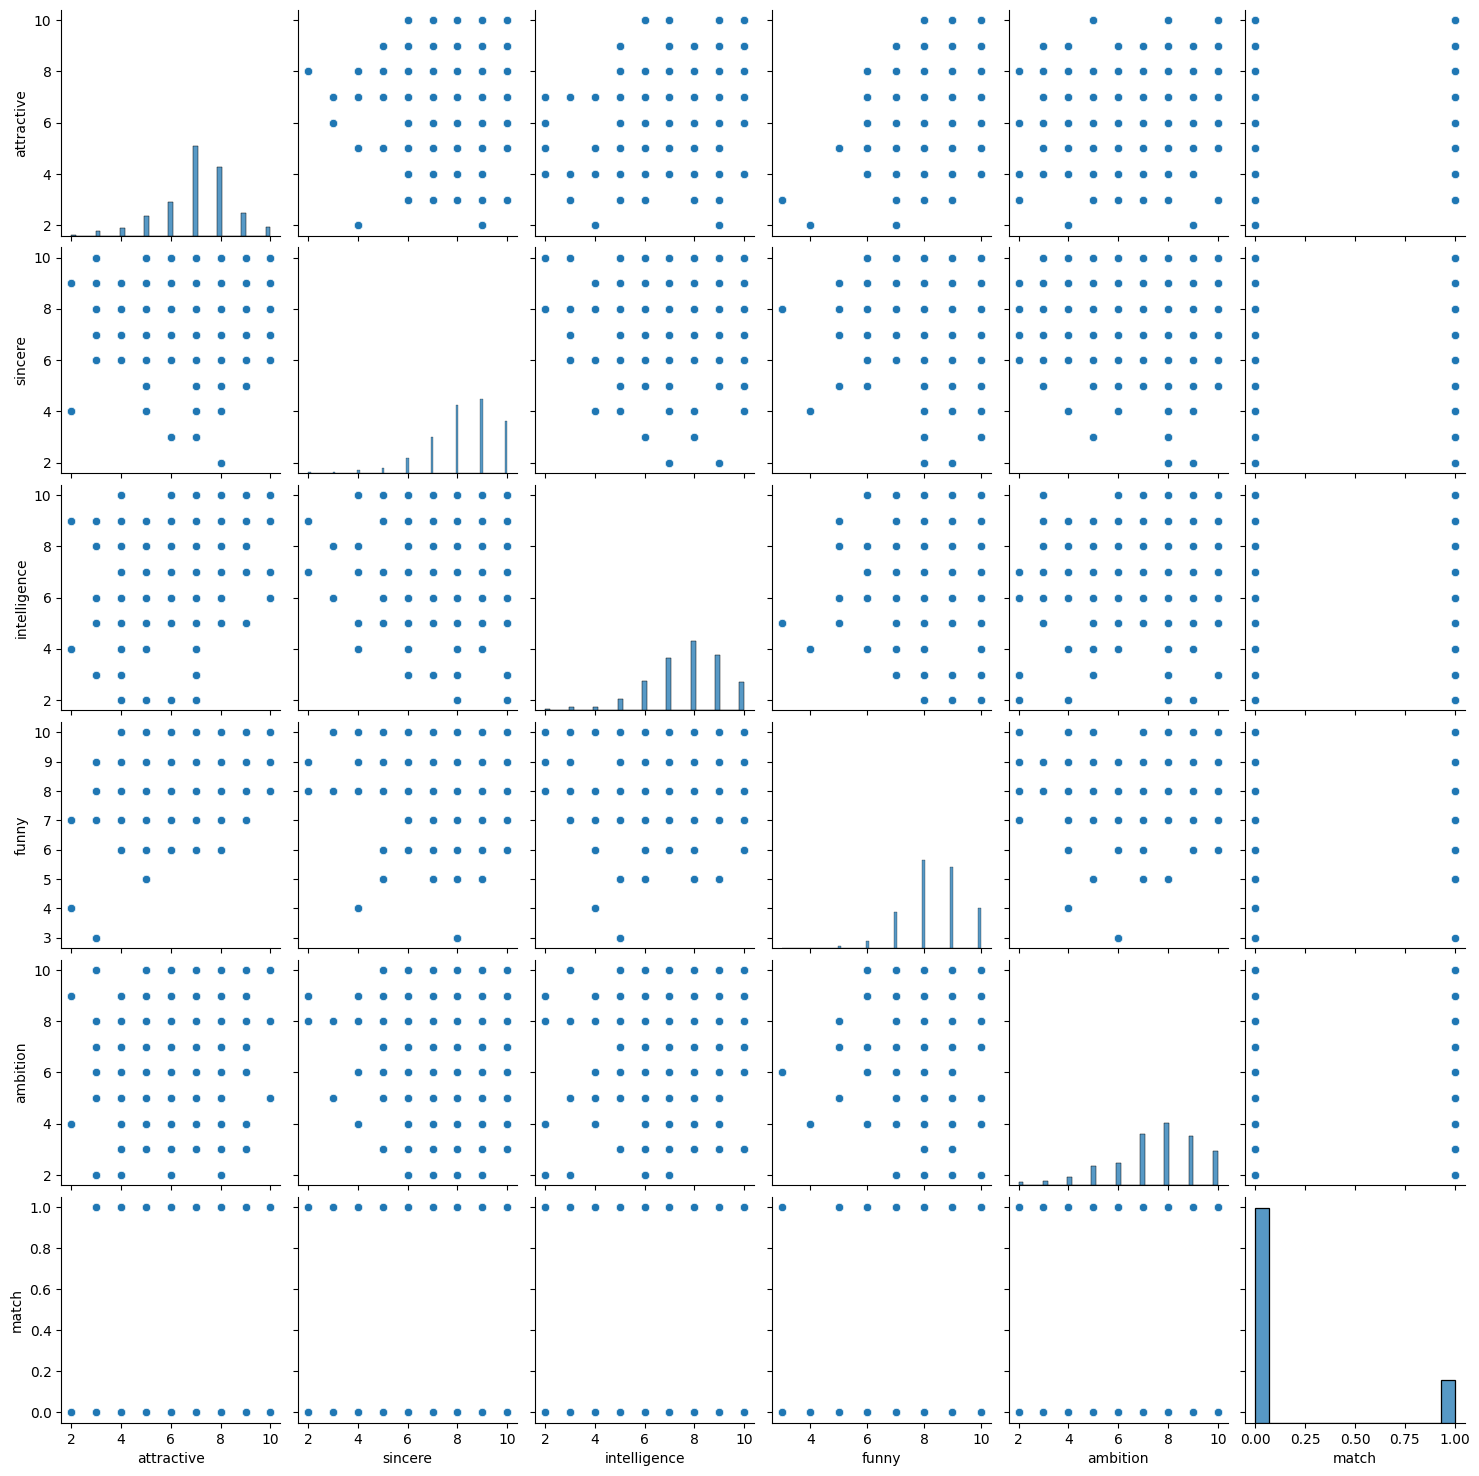

In [13]:
# There are a set of features where the participants rate themselves on
# 5 scales (attractive, sincere, intelligence, funny, ambition).
# Let's look at whether there are trends between their self-ratings and match

self_perception = pd.DataFrame([df.attractive, df.sincere, df.intelligence, df.funny, df.ambition, df.match]).transpose()
sns.pairplot(self_perception)

<Axes: >

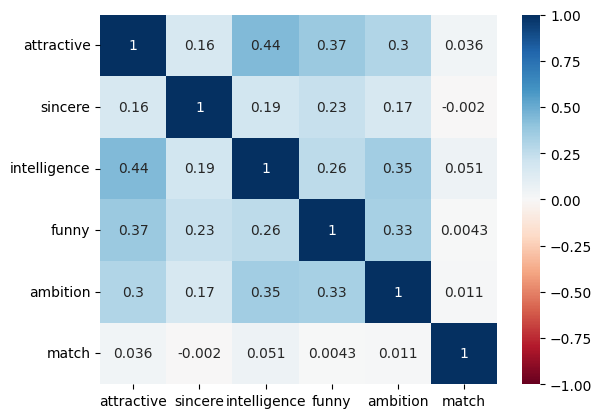

In [ ]:
self_per_corr = self_perception.corr()
sns.heatmap(self_per_corr,  vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

There doesn't seem to be much of a correlation between match and self-perception, so we may drop these

# Hobbies


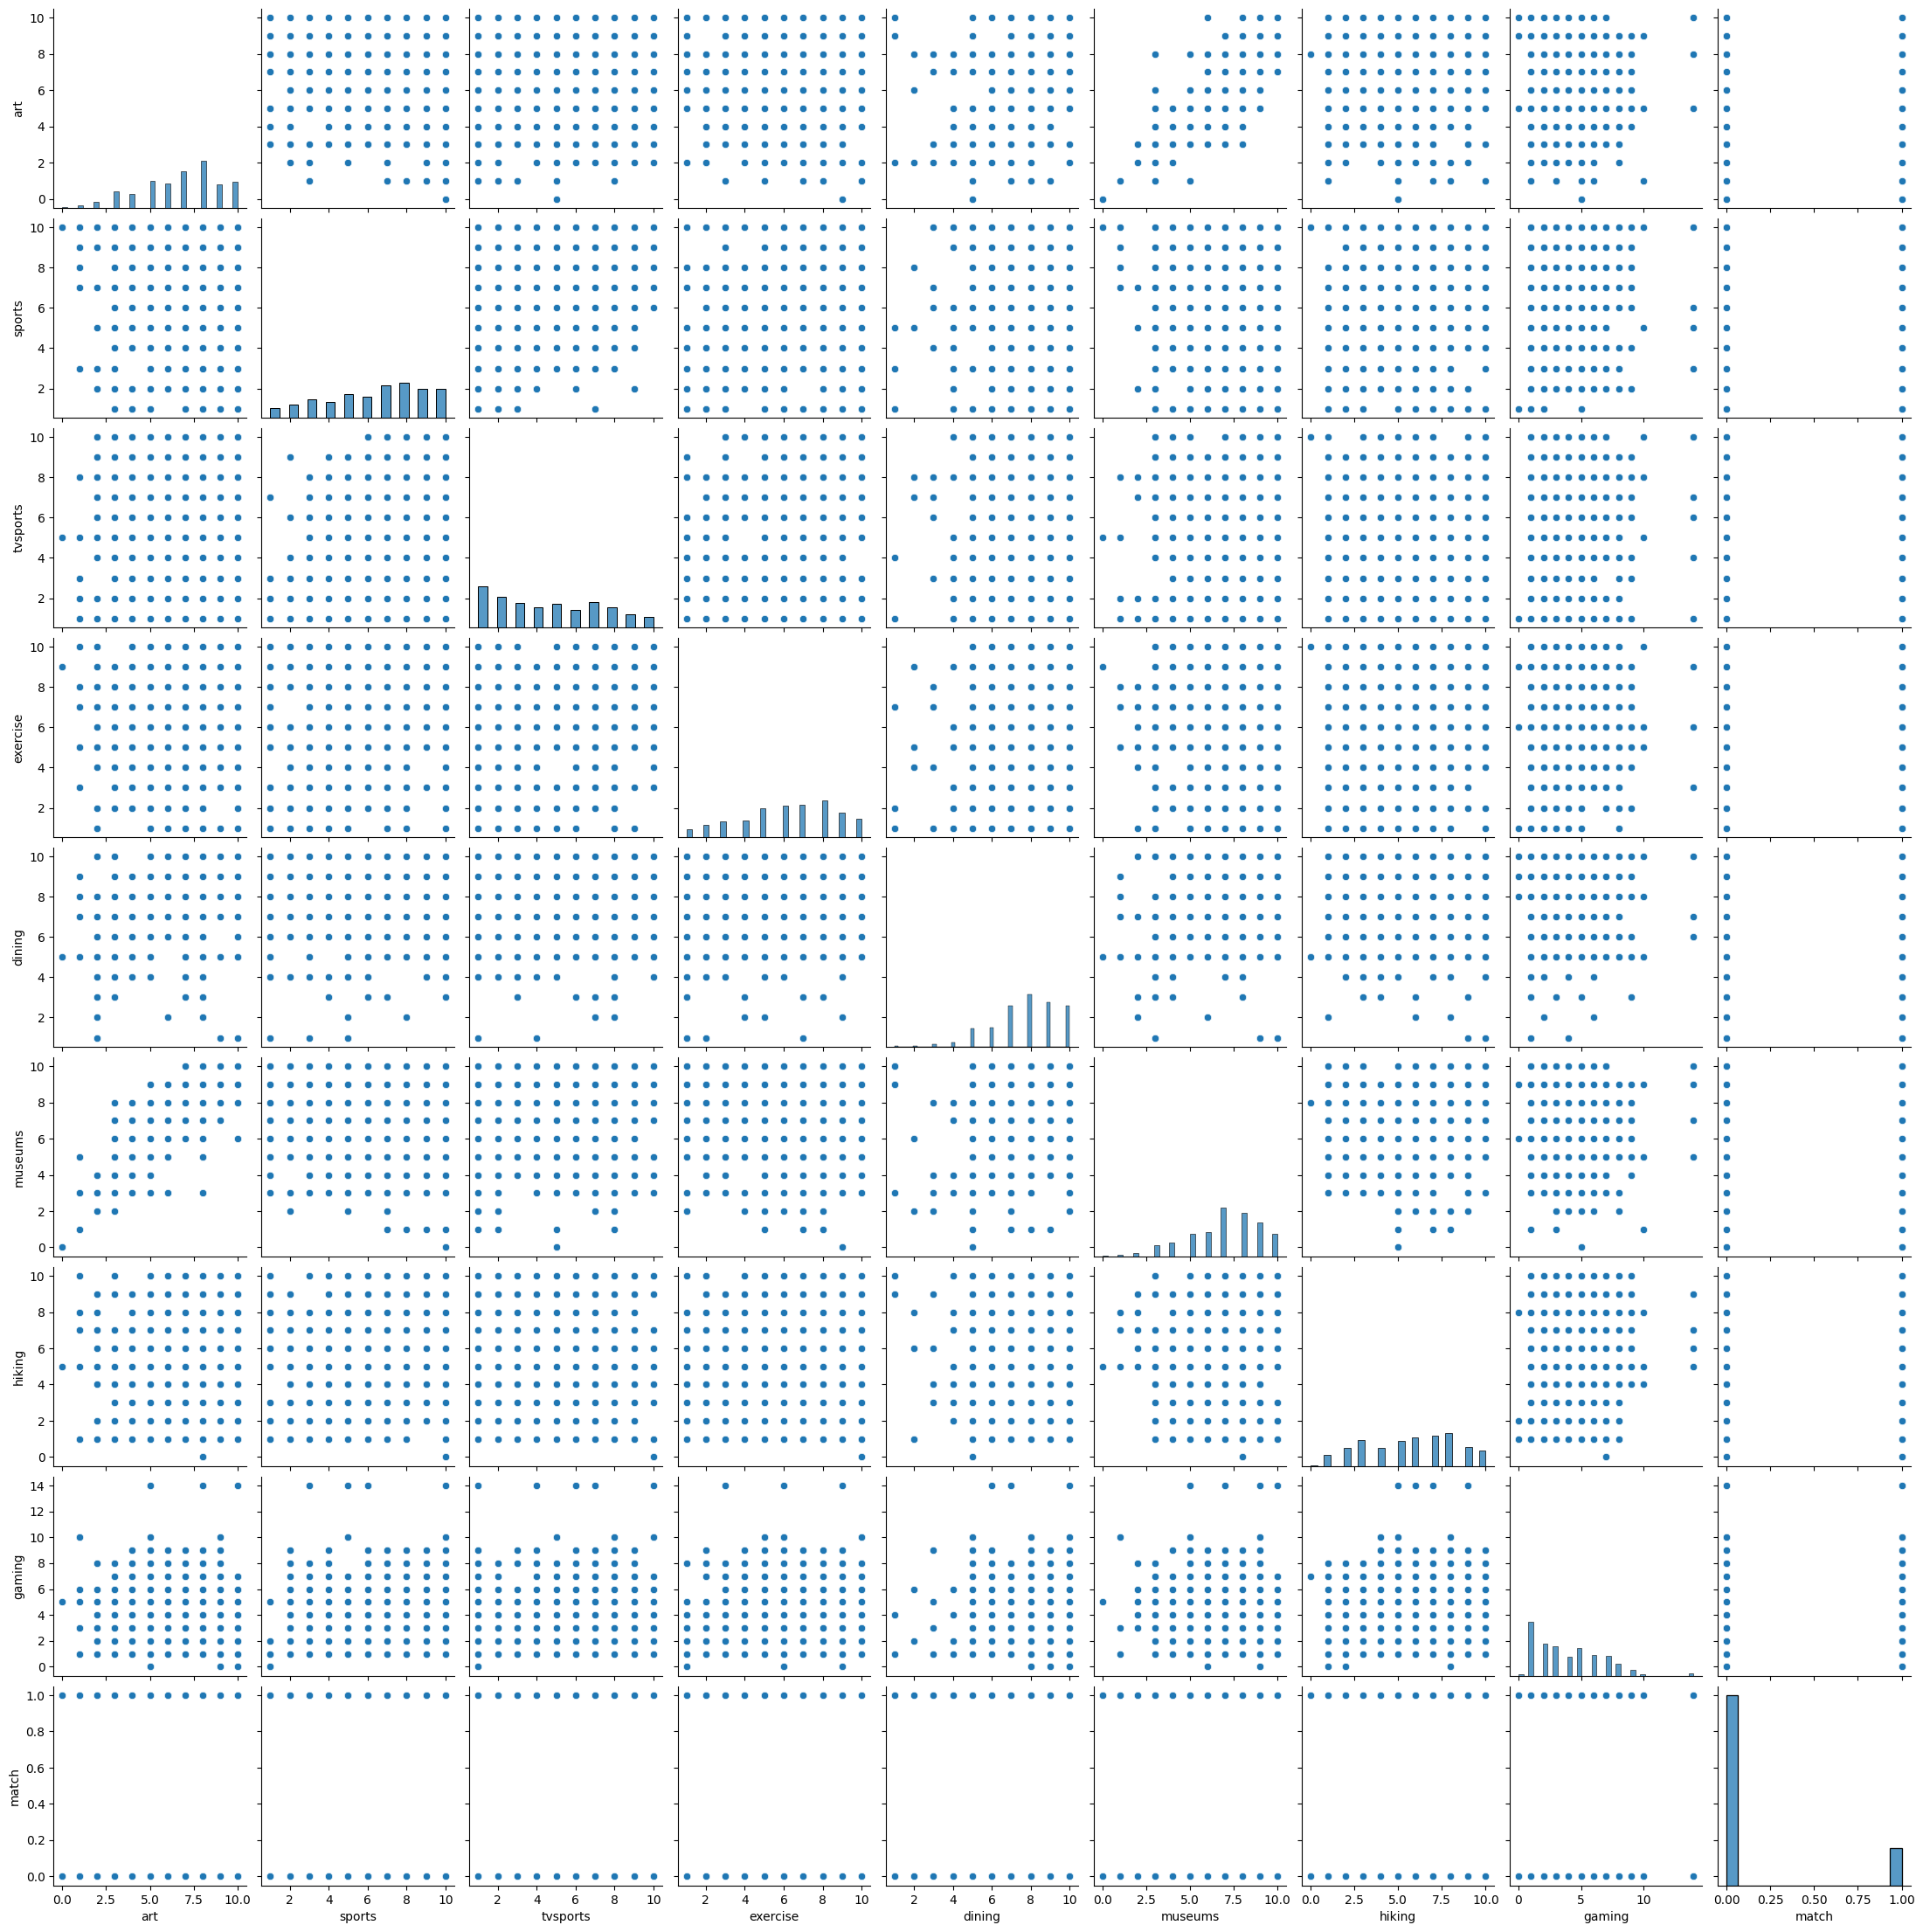

In [18]:
hobbiesPart1 = pd.DataFrame([df.art,df.sports,df.tvsports,df.exercise,df.dining,df.museums,df.hiking,df.gaming,df.match]).transpose()

sns.pairplot(hobbiesPart1)

<Axes: >

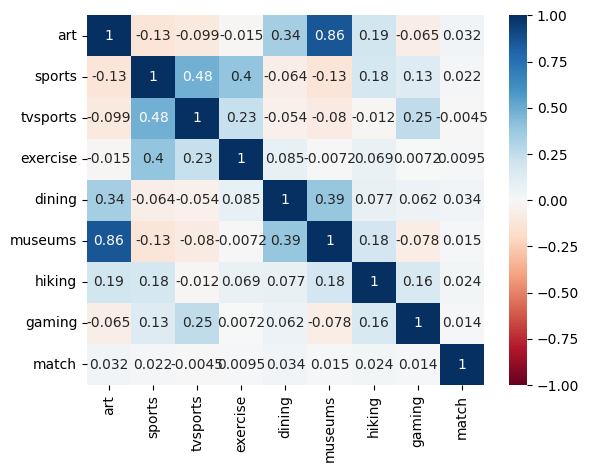

In [22]:
hobbiesPart1_corr = hobbiesPart1.corr()
sns.heatmap(hobbiesPart1_corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu' )

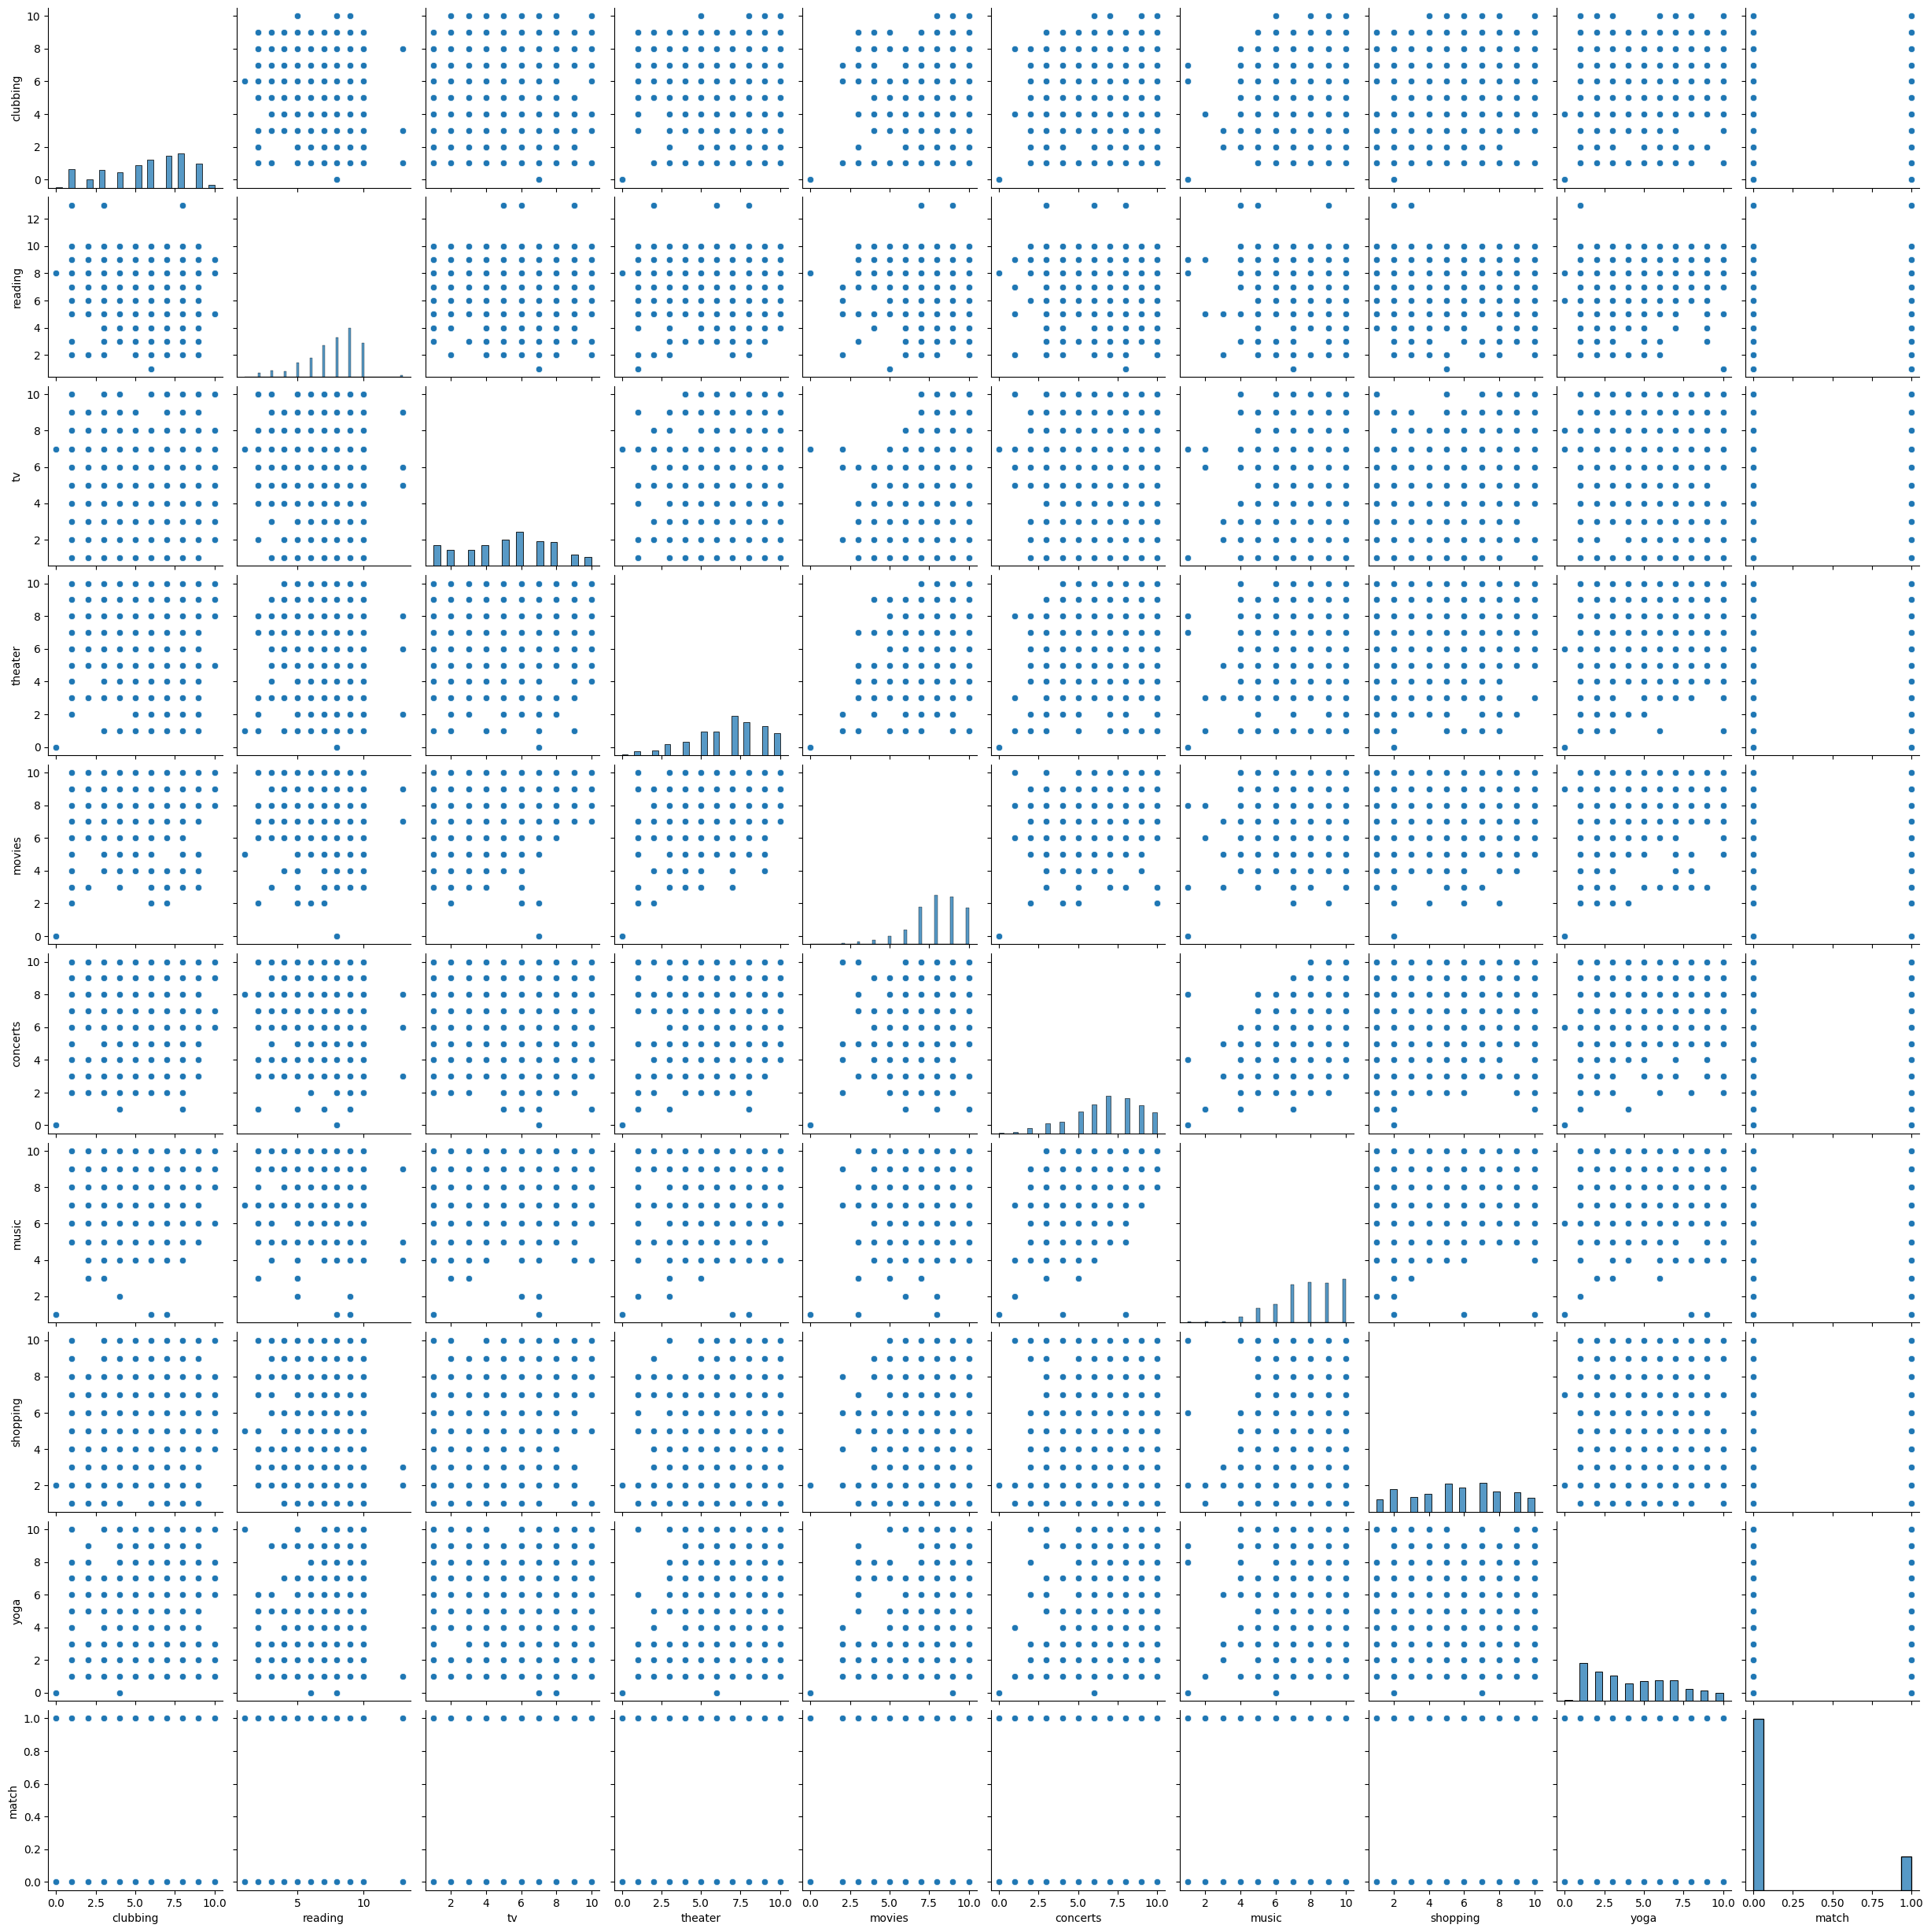

In [20]:
hobbiesPart2 = pd.DataFrame([df.clubbing,df.reading,df.tv,df.theater,df.movies,df.concerts,df.music,df.shopping,df.yoga, df.match]).transpose()
sns.pairplot(hobbiesPart2)

<Axes: >

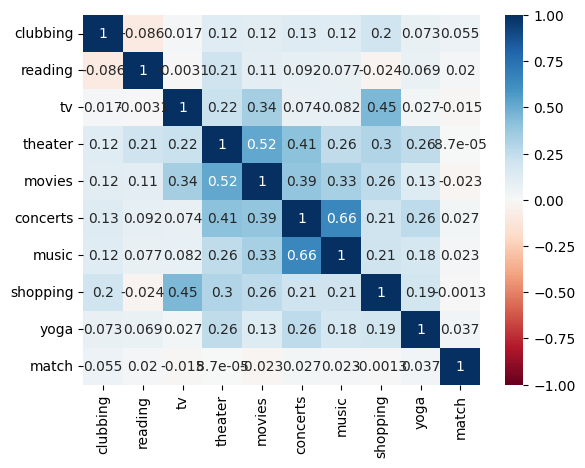

In [23]:
hobbiesPart2_corr = hobbiesPart2.corr()
sns.heatmap(hobbiesPart2_corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu' )

# Difference in Hobbies
Rather than individual hobby scores, it may be more useful to look at two people's difference in hobby scores. The dataset provides this differences as a range (0-5, 6-8 or 9-10), so we will convert these values to the average of the range.

In [34]:
hobbies_diff = pd.DataFrame([df.d_art,df.d_sports,df.d_tvsports,df.d_exercise,df.d_dining,df.d_museums,df.d_hiking,df.d_gaming,df.d_clubbing,df.d_reading,df.d_tv,df.d_theater,
                        df.d_movies,df.d_concerts,df.d_music,df.d_shopping,df.d_yoga,df.match]).transpose()
hobbies_diff = hobbies_diff.replace("b'[0-5]'",2.5)
hobbies_diff = hobbies_diff.replace("b'[6-8]'",7)
hobbies_diff = hobbies_diff.replace("b'[9-10]'",9.5)
hobbies_diff.describe()

,d_art,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,match
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,6.175101,6.011876,4.447422,5.821318,7.373538,6.546133,5.359453,3.821676,5.470100,7.330329,5.012234,6.339222,7.590952,6.429876,7.475949,5.273753,4.295834,0.164717
std,2.618588,2.810954,2.593520,2.688196,2.189832,2.485914,2.703941,2.218544,2.612613,2.359571,2.591065,2.625027,2.035694,2.540552,2.186358,2.766000,2.529120,0.370947
min,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,0.000000
25%,2.500000,2.500000,2.500000,2.500000,7.000000,7.000000,2.500000,2.500000,2.500000,7.000000,2.500000,2.500000,7.000000,2.500000,7.000000,2.500000,2.500000,0.000000
50%,7.000000,7.000000,2.500000,7.000000,7.000000,7.000000,7.000000,2.500000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.500000,0.000000
75%,7.000000,9.500000,7.000000,7.000000,9.500000,7.000000,7.000000,7.000000,7.000000,9.500000,7.000000,7.000000,9.500000,7.000000,9.500000,7.000000,7.000000,0.000000
max,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,1.000000


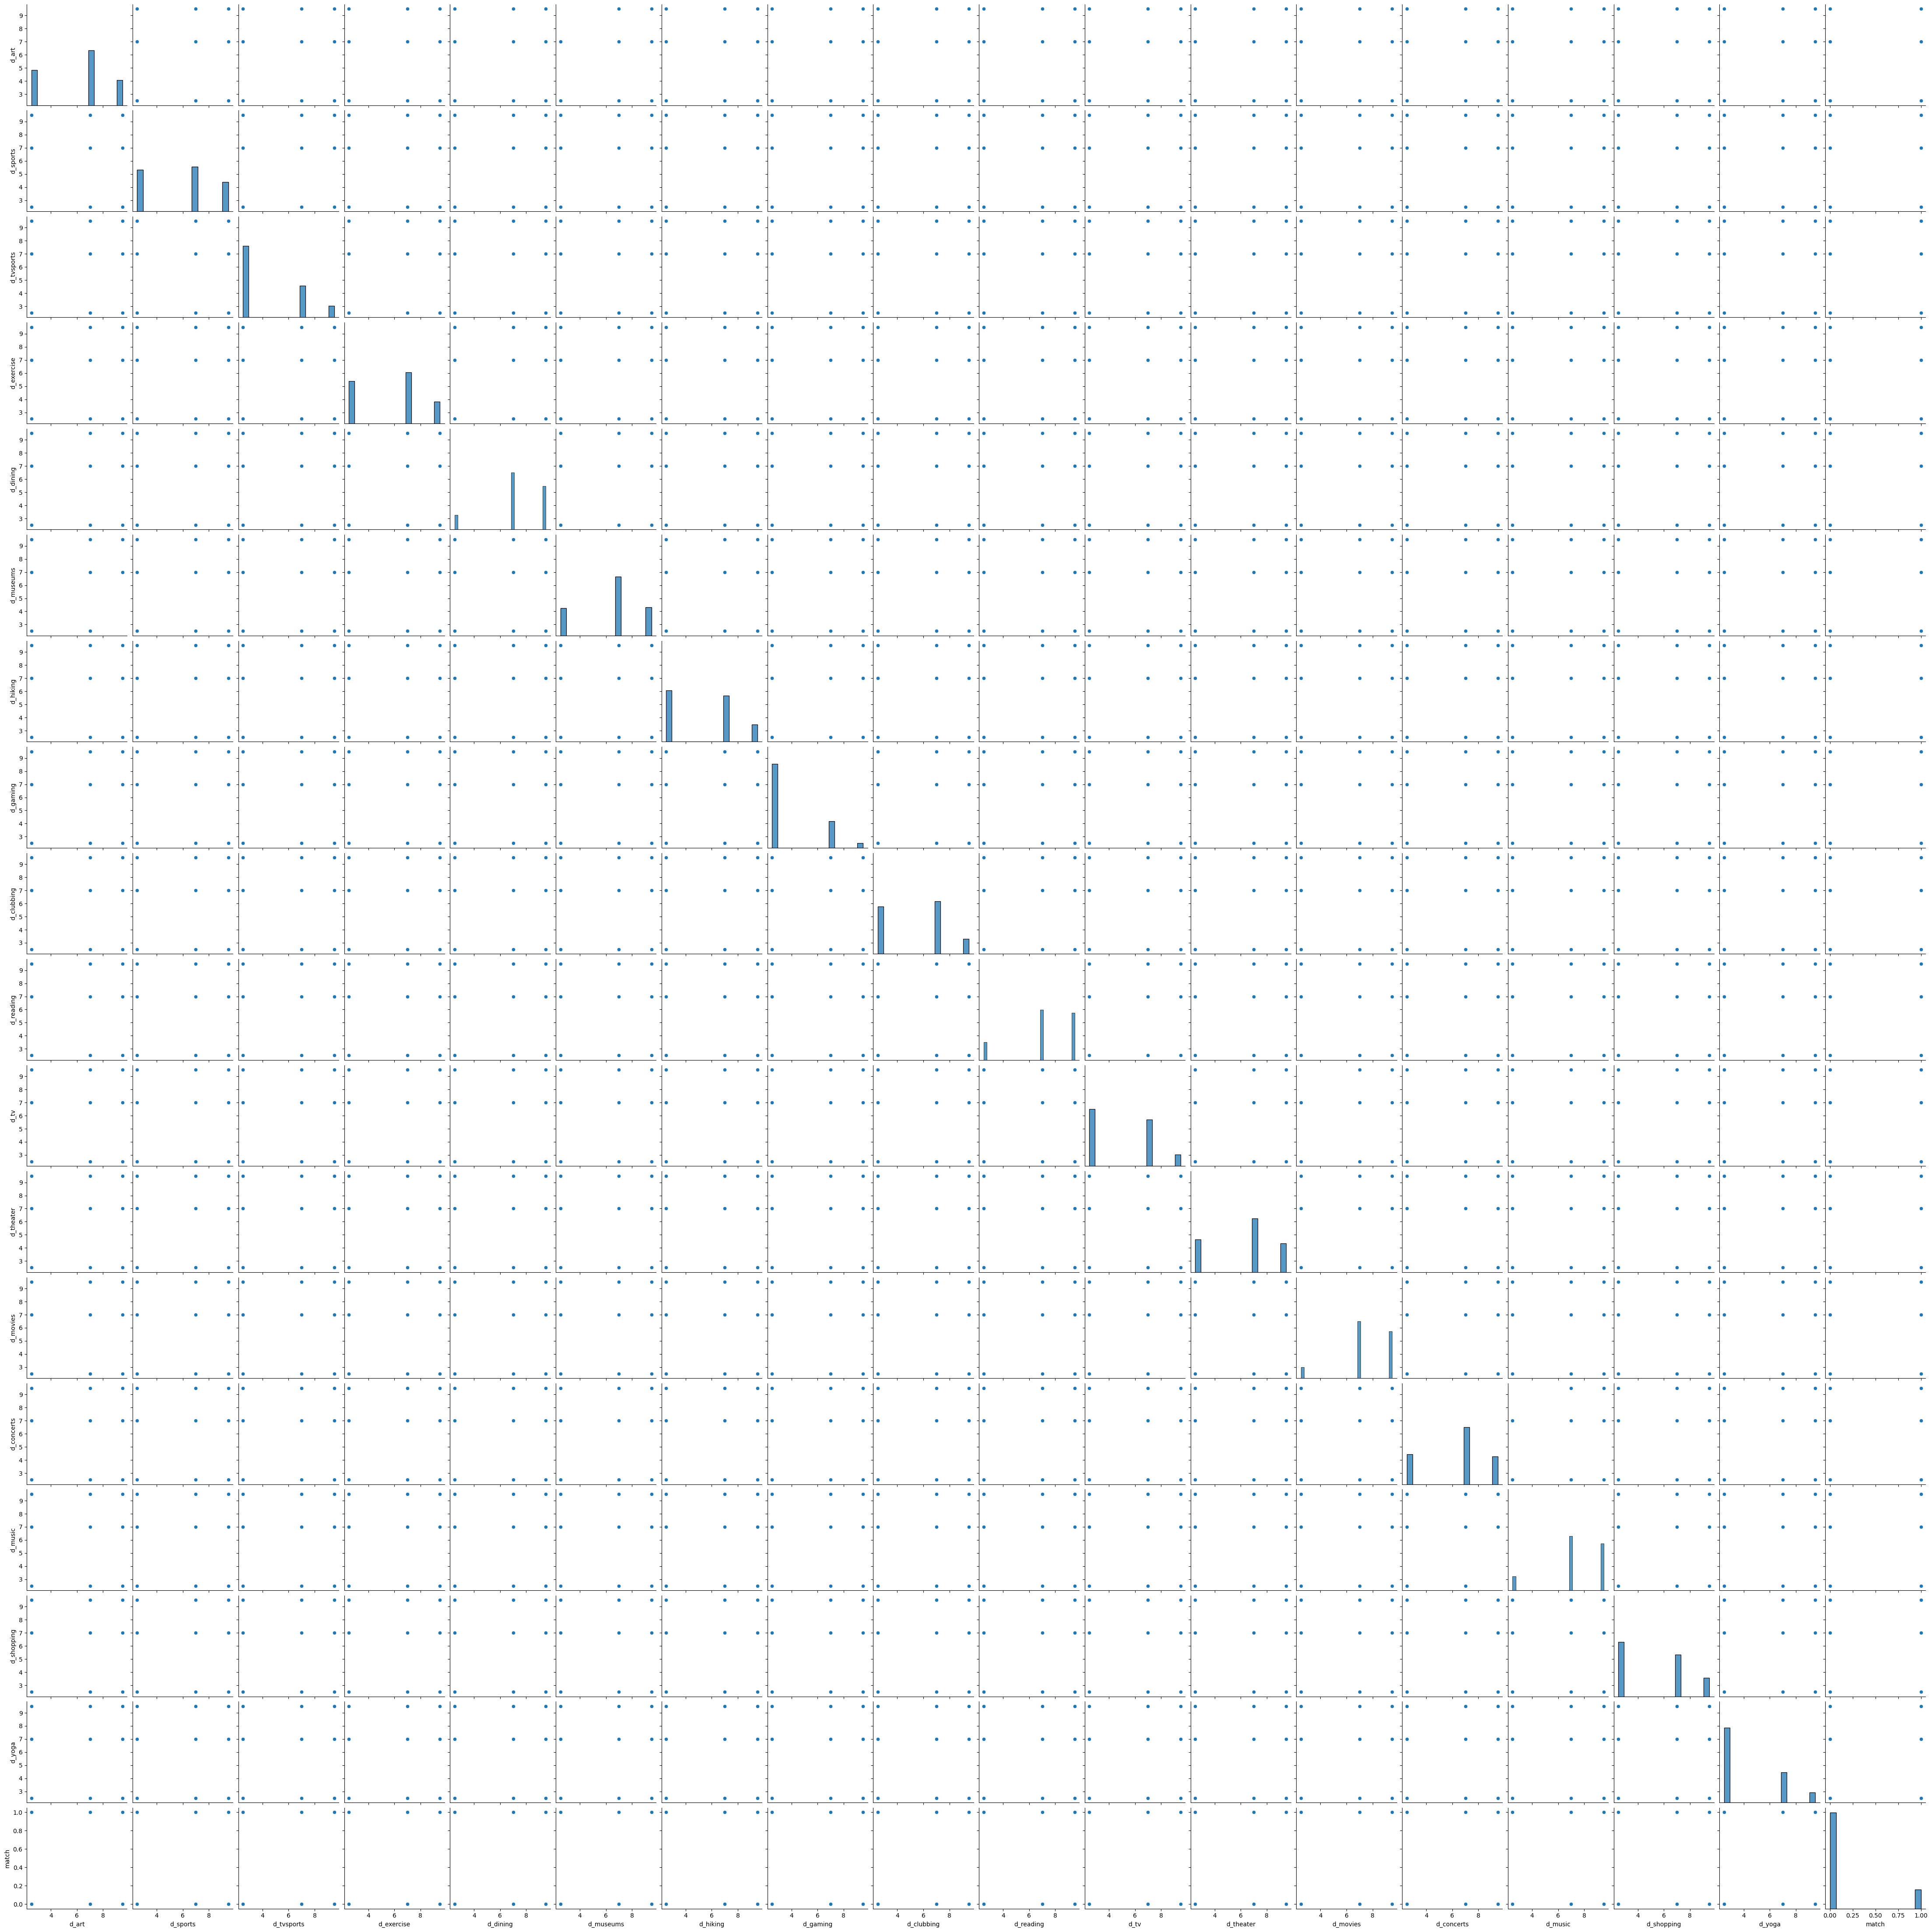

In [42]:
sns.pairplot(hobbies_diff)

<Axes: >

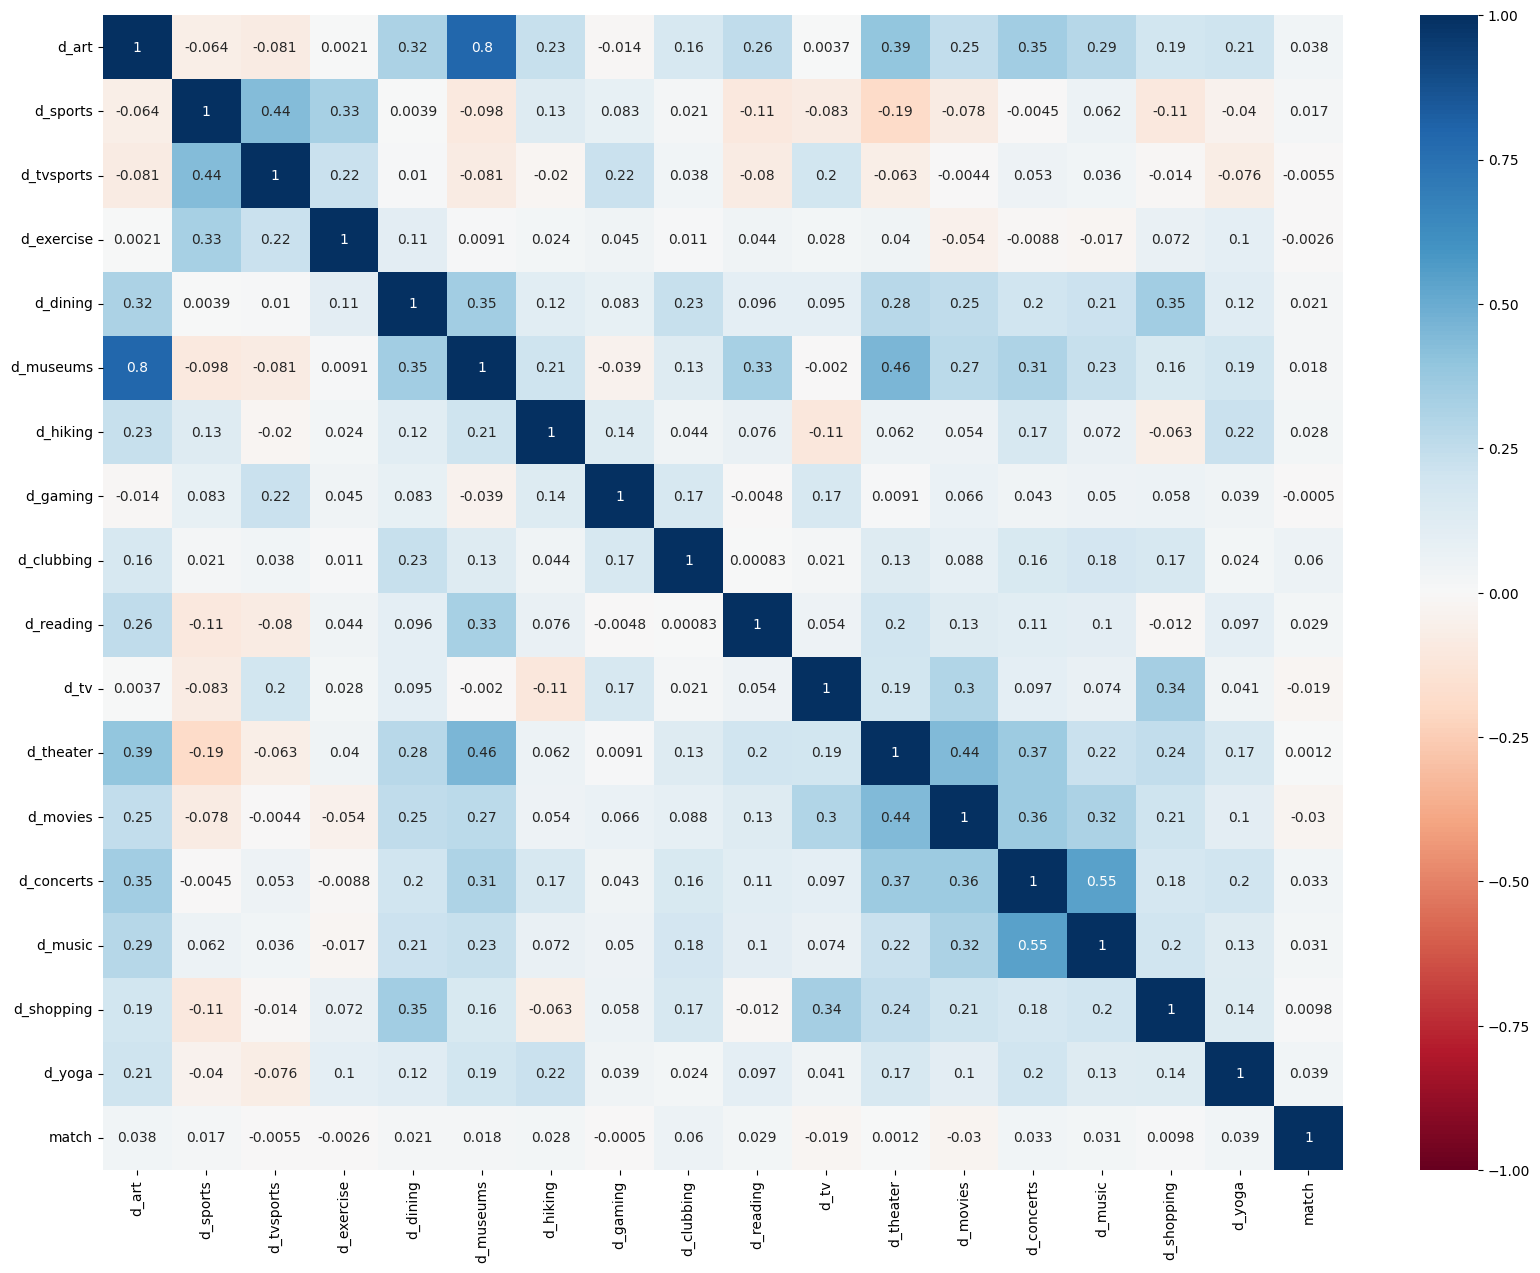

In [33]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))

hobbies_diff_corr = hobbies_diff.corr()
sns.heatmap(hobbies_diff_corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu' )

# Difference in preferences
Each participant was also asked to rate how important it is that the their partner is attractice, intelligent, sincere, ambitious or funny. The dataset computes the difference between the two people's answers for each metric and puts it in a range. Let's explore this part of the data.

In [43]:
pref_diff = pd.DataFrame([df.d_attractive_important, df.d_sincere_important, df.d_intellicence_important,df.d_funny_important,df.d_ambtition_important, df.d_shared_interests_important,df.match]).transpose()

# Convert ranges to average value
pref_diff = pref_diff.replace("b'[21-100]'",39.5 )
pref_diff = pref_diff.replace("b'[16-20]'",18 )
pref_diff = pref_diff.replace("b'[0-15]'", 7.5 )
pref_diff.describe()

,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,match
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,22.634340,17.998985,22.476605,17.396992,9.871867,11.225710,0.164717
std,13.334292,11.081266,11.821594,10.694849,5.204178,7.240647,0.370947
min,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,0.000000
25%,7.500000,7.500000,18.000000,7.500000,7.500000,7.500000,0.000000
50%,18.000000,18.000000,18.000000,18.000000,7.500000,7.500000,0.000000
75%,39.500000,18.000000,39.500000,18.000000,7.500000,18.000000,0.000000
max,39.500000,39.500000,39.500000,39.500000,39.500000,39.500000,1.000000


<Axes: >

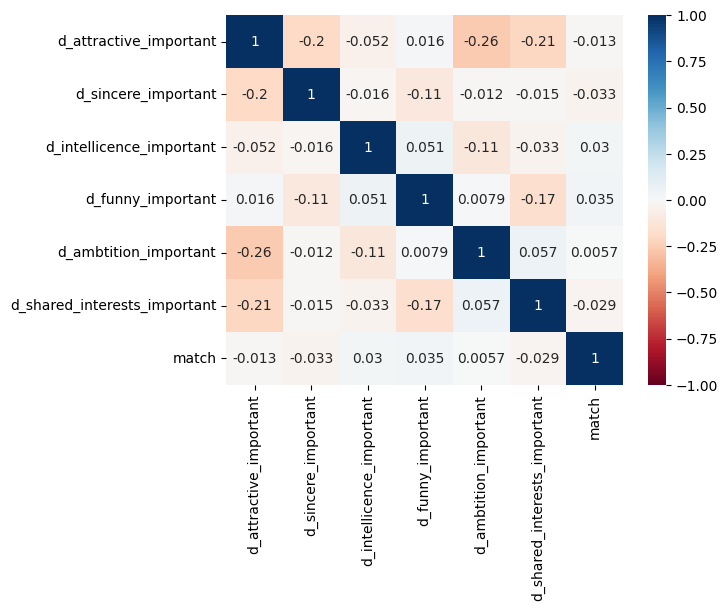

In [41]:

pref_diff_corr = pref_diff.corr()
sns.heatmap(pref_diff_corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu' )